### Calculate angular and energy dependence of the penetration depth into LBCO

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

Pull data from Chris Homes
PHYSICALREVIEW B85,134510(2012)  

60 K data is chosen. Other datasets can be found in [Chris's database](https://infrared.phy.bnl.gov/data/Infrared/)

  comments  
  column 1: wave number (cm-1): 1 eV = 8065.5 cm-1  
  column 2: real part of the dielectric function  
  column 3: imaginary part of the dielectric function  
  column 4: experimental reflectance  
  column 5: real part of the optical conductivity (Ohm-1cm-1)  
  column 6: phase (rad) 
  
Note that we haven't taken account of the anisotropy. I wonder how big an error this is?

Define functions to pull data

In [3]:
import os
import urllib.request

filenames = ['lbco125/ellab/copt_005.kk',
            'lbco125/ellab/copt_030.kk',
            'lbco125/ellab/copt_040.kk',
            'lbco125/ellab/copt_060.kk',
            'lbco125/ellab/copt_150.kk',
            'lbco125/ellab/copt_295.kk']

filenames_ansio = ['lbco125/ellab/copt_060.kk',
                  'lbco125/ellc/copt_100.kk']


for filename in filenames + filenames_ansio:
    if not os.path.exists(filename):
        url = os.path.join('https://infrared.phy.bnl.gov/data/Infrared/lbco/',
                            filename)
        urllib.request.urlretrieve(url, os.path.join('datafiles/',
                                                     filename))



Define functions to compute reflectivity and beta (inverse penetration depth)

In [4]:
def compute_reflectivity(epsilon, theta):
    """get the two reflectivity components
    
    parameters
    ------
    epsilon : complex float or array
    theta : incident angle [rad]
        optics definition of zero at normal incidence!
    
    returns
    -----
    R_s, R_p
        sigma pi polarization reflectivitires
    """
    n = np.real(np.sqrt(epsilon))
    K = np.imag(np.sqrt(epsilon))
    z = n**2 - K**2 - (np.sin(theta)**2)
    a = np.sqrt(z**2 + 4*n*K)
    R_s = (((np.sqrt(z + a)-np.sqrt(2)*np.cos(theta))**2 + a - z)/
           ((np.sqrt(z + a)+np.sqrt(2)*np.cos(theta))**2 + a - z))
    R_p = (R_s*((np.sqrt(z + a)-np.sqrt(2)*np.sin(theta)*np.tan(theta))**2 + a - z)/
           ((np.sqrt(z + a)+np.sqrt(2)*np.sin(theta)*np.tan(theta))**2 + a - z))
    return R_s, R_p

def compute_beta_z(E, epsilon, theta):
    """get the beta_z value that defines inverse penetration
    
    parameters
    ------
    E : float or array
        energy in eV
    epsilon : complex float or array
    theta : incident angle [rad]
        optics definition of zero at normal incidence!
        
    returns
    -----
    R_s, R_p
        beta_z -- inverse penetration in inverse m
    """
    n = np.real(np.sqrt(epsilon))
    K = np.imag(np.sqrt(epsilon))
    h_bar = 6.582119514e-16 #eV.s
    omega = E/h_bar
    c = 3e8
    k_z = np.real((omega/c)*np.sqrt((n + 1j*K)**2 - np.sin(theta)**2))
    beta_z = np.imag((omega/c)*np.sqrt((n + 1j*K)**2 - np.sin(theta)**2))
    return beta_z

Load $\epsilon$ and the reflectivity for LBCO with electric field in the ab-plane at 60 K

In [5]:
filename = filenames[3]
print(filename)
path = os.path.join('datafiles', filename)
wn, e1, e2, *_ = np.loadtxt(path, unpack=True, skiprows=3)
E = wn/8065.5
epsilon = e1 + 1j*e2
R = np.abs((1 - np.sqrt(epsilon))/(1 + np.sqrt(epsilon)))

lbco125/ellab/copt_060.kk


Plot wide and narrow views of the different quantities

Text(0.5, 0.98, 'LBCO 60 K E//ab')

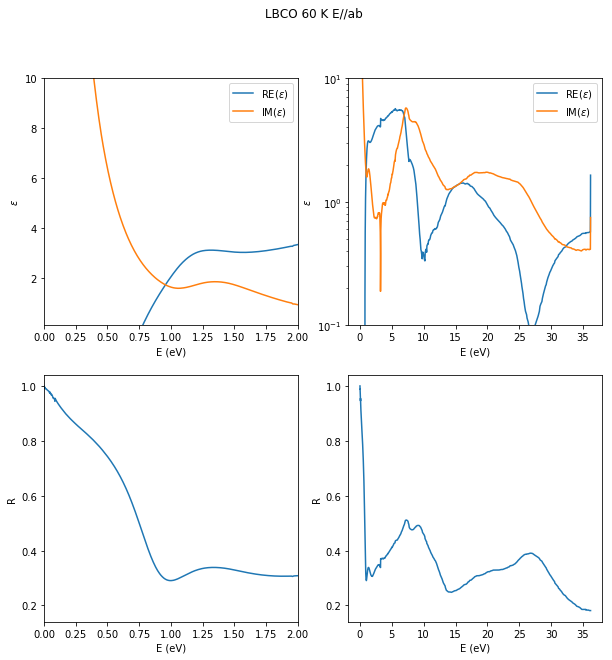

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax in axs[0, :].ravel():
    ax.semilogy(E, e1, label='RE$(\epsilon)$')
    ax.semilogy(E, e2, label='IM$(\epsilon)$')
    ax.set_xlabel('E (eV)')
    ax.set_ylabel('$\epsilon$')
    ax.set_ylim(bottom=1e-1, top=1e1)
    ax.legend()

for ax in axs[1, :].ravel():
    ax.plot(E, R)
    ax.set_xlabel('E (eV)')
    ax.set_ylabel('R')

for ax in axs[:,0].ravel():
    ax.set_xlim(left=0, right=2)
    
ax = axs[0, 0]
ax.set_yscale('linear')

fig.suptitle('LBCO 60 K E//ab')

Compute the angular dependence of the penetration depth at fixed energy

Text(0.5, 0.98, 'LBCO 60 K E//ab')

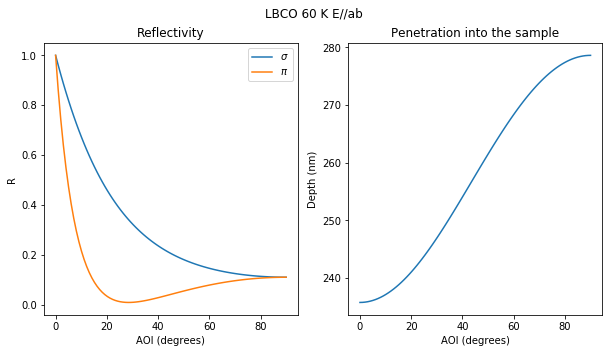

In [7]:
theta = np.linspace(0, np.pi/2, 90)
AOI = (np.pi/2 - theta)*180./np.pi

# 800 nm is 1.55 eV
chooseE = 1.55
choose = np.argmin((E - chooseE)**2)
R_s, R_p = compute_reflectivity(epsilon[choose], theta)
beta_z = compute_beta_z(chooseE, epsilon[choose], theta)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(AOI, R_s, label='$\sigma$')
axs[0].plot(AOI, R_p, label='$\pi$')
axs[0].legend()
axs[0].set_title('Reflectivity')
axs[0].set_xlabel('AOI (degrees)')
axs[0].set_ylabel('R')

axs[1].plot(AOI, 1/beta_z*1e9)
axs[1].set_title('Penetration into the sample')
axs[1].set_xlabel('AOI (degrees)')
axs[1].set_ylabel('Depth (nm)')

fig.suptitle('LBCO 60 K E//ab')

Compute energy dependence at 15 deg

Text(0.5, 0.98, 'LBCO 60 K E//ab')

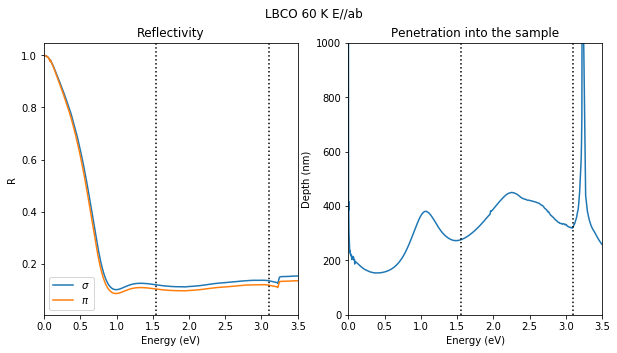

In [8]:
theta_val = 15*np.pi/180
R_s, R_p = compute_reflectivity(epsilon, theta_val)
beta_z = compute_beta_z(E, epsilon, theta_val)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(E, R_s, label='$\sigma$')
axs[0].plot(E, R_p, label='$\pi$')
axs[0].legend()
axs[0].set_title('Reflectivity')
axs[0].set_xlabel('Energy (eV)')
axs[0].set_ylabel('R')

axs[1].plot(E, 1/beta_z*1e9)
axs[1].set_title('Penetration into the sample')
axs[1].set_xlabel('Energy (eV)')
axs[1].set_ylabel('Depth (nm)')

[ax.set_xlim(left=0, right=3.5) for ax in axs]
axs[1].set_ylim(bottom=0, top=1000)

[ax.axvline(x=1.55, color='k', linestyle=':') for ax in axs]
[ax.axvline(x=1.55*2, color='k', linestyle=':') for ax in axs]

fig.suptitle('LBCO 60 K E//ab')

Check the temperature dependence. This turns out to be minimal

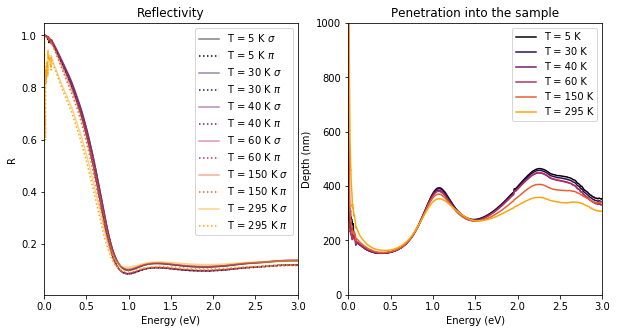

In [9]:
theta_val = 15*np.pi/180
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

import matplotlib as mpl
colors = mpl.cm.inferno(np.linspace(0, .8, len(filenames)))

for filename, color in zip(filenames, colors):
    T = int(filename[-6:-3])
    path = os.path.join('datafiles', filename)
    wn, e1, e2, *_ = np.loadtxt(path, unpack=True, skiprows=3)
    E = wn/8065.5
    epsilon = e1 + 1j*e2
    R_s, R_p = compute_reflectivity(epsilon, theta_val)
    beta_z = compute_beta_z(E, epsilon, theta_val)


    l = axs[0].plot(E, R_s, '-', alpha=0.5, label='T = {} K $\sigma$'.format(T),
                   color=color)
    axs[0].plot(E, R_p, ':', label='T = {} K $\pi$'.format(T),
                   color=color)
    axs[0].legend()
    axs[0].set_title('Reflectivity')
    axs[0].set_xlabel('Energy (eV)')
    axs[0].set_ylabel('R')

    axs[1].plot(E, 1/beta_z*1e9, label='T = {} K'.format(T),
               color=color)
    axs[1].set_title('Penetration into the sample')
    axs[1].set_xlabel('Energy (eV)')
    axs[1].set_ylabel('Depth (nm)')

    [ax.set_xlim(left=0, right=3) for ax in axs]
    axs[1].set_ylim(bottom=0, top=1000)

[ax.legend() for ax in axs]

Look at anisotropy. This is quite large. 

I'm far from certain that the equations are correct in this case, however.

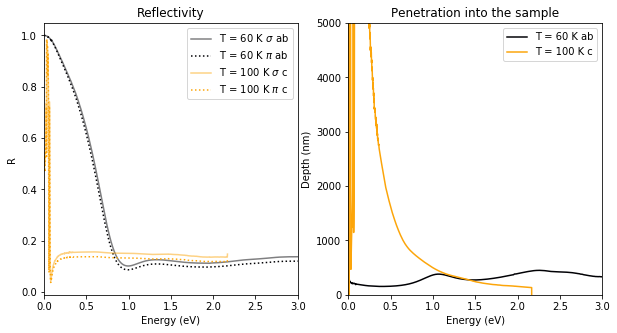

In [10]:
theta_val = 15*np.pi/180
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

import matplotlib as mpl
colors = mpl.cm.inferno(np.linspace(0, .8, len(filenames_ansio)))

for filename, color, pol in zip(filenames_ansio, colors, ['ab', 'c']):
    T = int(filename[-6:-3])
    path = os.path.join('datafiles', filename)
    wn, e1, e2, *_ = np.loadtxt(path, unpack=True, skiprows=3)
    E = wn/8065.5
    epsilon = e1 + 1j*e2
    R_s, R_p = compute_reflectivity(epsilon, theta_val)
    beta_z = compute_beta_z(E, epsilon, theta_val)


    l = axs[0].plot(E, R_s, '-', alpha=0.5, label='T = {} K $\sigma$ {}'.format(T, pol),
                   color=color)
    axs[0].plot(E, R_p, ':', label='T = {} K $\pi$ {}'.format(T, pol),
                   color=color)
    axs[0].legend()
    axs[0].set_title('Reflectivity')
    axs[0].set_xlabel('Energy (eV)')
    axs[0].set_ylabel('R')

    axs[1].plot(E, 1/beta_z*1e9, label='T = {} K {}'.format(T, pol),
               color=color)
    axs[1].set_title('Penetration into the sample')
    axs[1].set_xlabel('Energy (eV)')
    axs[1].set_ylabel('Depth (nm)')

    [ax.set_xlim(left=0, right=3) for ax in axs]
    axs[1].set_ylim(bottom=0, top=5000)

[ax.legend() for ax in axs]

compute values for proposed conditions

In [11]:
filename = filenames[3]
path = os.path.join('datafiles', filename)
wn, e1, e2, *_ = np.loadtxt(path, unpack=True, skiprows=3)
epsilon = e1 + 1j*e2
E = wn/8065.5

getE = 1.55
get_th = 15*np.pi/180
beta_z = compute_beta_z(E, epsilon, get_th)

penetration = 1e9/beta_z[np.argmin((E-getE)**2)] # nm

print("LBCO 1/8 E//ab 60 K theta={:.2f} deg E={:.2f} penetration {:.1f} nm".format(get_th*180/np.pi, getE, penetration))

LBCO 1/8 E//ab 60 K theta=15.00 deg E=1.55 penetration 276.0 nm
